In [5]:
import pandas as pd
import numpy as np

from sktime.datasets import load_airline
#from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.naive import NaiveForecaster

from sktime.utils.plotting import plot_series

In [2]:
# step 1: data specification
y = load_airline()


c:\Users\pzegadlo\AppData\Local\Programs\Python\Python39\lib\site-packages\sktime\datasets\_single_problem_loaders.py:737: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  y = pd.read_csv(path, index_col=0, squeeze=True, dtype={1: float})


In [4]:
type(y)

pandas.core.series.Series

(<Figure size 1152x288 with 1 Axes>,
 <AxesSubplot:ylabel='Number of airline passengers'>)

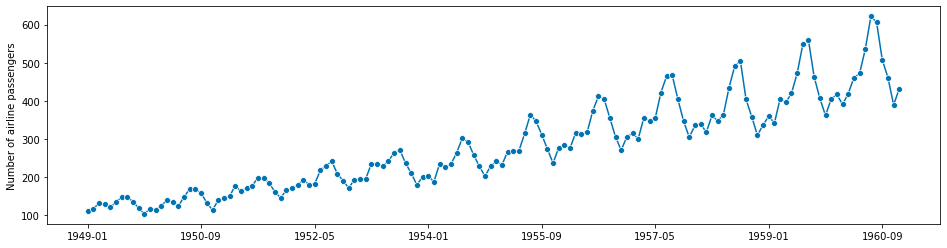

In [6]:
plot_series(y)

In [7]:
# step 2: specifying forecasting horizon
fh = np.arange(1, 37)

In [24]:
# step 3: specifying the forecasting algorithm
forecaster = NaiveForecaster(strategy="mean", sp=12)

In [25]:
# step 4: fitting the forecaster
forecaster.fit(y)

NaiveForecaster(sp=12, strategy='mean')

In [26]:
# step 5: querying predictions
y_pred = forecaster.predict(fh)

(<Figure size 1152x288 with 1 Axes>,
 <AxesSubplot:ylabel='Number of airline passengers'>)

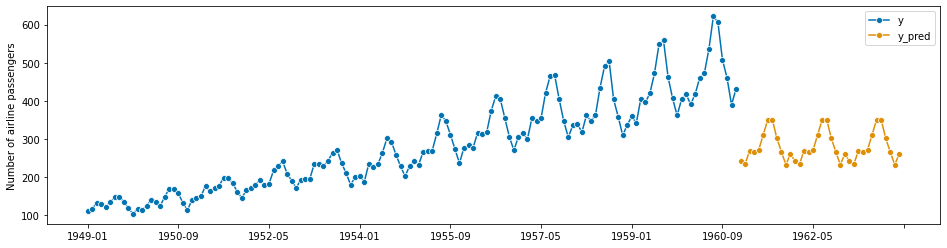

In [27]:
# optional: plotting predictions and past data
plot_series(y, y_pred, labels=["y", "y_pred"])

In [28]:
from sktime.forecasting.theta import ThetaForecaster
# step 3: specifying the forecasting algorithm
forecaster = ThetaForecaster(sp = 12)

# step 4: fitting the forecaster
forecaster.fit(y)

# step 5: querying predictions
y_pred = forecaster.predict(fh)

In [29]:
coverage = 0.9
y_pred_ints = forecaster.predict_interval(coverage=coverage)
y_pred_ints

Coverage            
                0.9            
              lower       upper
1961-01  418.280122  464.281951
1961-02  402.215882  456.888054
1961-03  459.966115  522.110499
1961-04  442.589311  511.399213
1961-05  443.525030  518.409479
1961-06  506.585817  587.087735
1961-07  561.496772  647.248954
1961-08  557.363326  648.062361
1961-09  477.658059  573.047750
1961-10  407.915094  507.775352
1961-11  346.942927  451.082014
1961-12  394.708225  502.957139
1962-01  399.628458  511.836771
1962-02  385.564801  501.597484
1962-03  447.164614  566.899578
1962-04  430.825485  554.151637
1962-05  433.140589  559.956274
1962-06  499.398268  629.610003
1962-07  557.085965  690.607402
1962-08  553.705640  690.456699
1962-09  472.237087  612.143235
1962-10  400.983992  543.975630
1962-11  338.726674  484.738613
1962-12  388.617659  537.588678
1963-01  394.247965  546.120420
1963-02  380.250571  534.970061
1963-03  444.268347  601.783422
1963-04  427.851910  588.113811
1963-05  430.648392  593.610827
1963-06  499.362024  664.980964
1963-07  559.203753  727.437255
1963-08  556.045471  726.853519
1963-09  472.355236  645.699597
1963-10  399.192352  575.036447
1963-11  335.298422  513.607210
1963-12  387.003719  567.743592

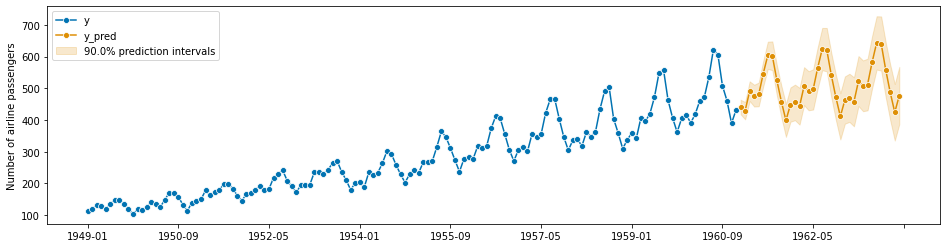

In [30]:
from sktime.utils import plotting

fig, ax = plotting.plot_series(y, y_pred, labels=["y", "y_pred"])
ax.fill_between(
    ax.get_lines()[-1].get_xdata(),
    y_pred_ints["Coverage"][coverage]["lower"],
    y_pred_ints["Coverage"][coverage]["upper"],
    alpha=0.2,
    color=ax.get_lines()[-1].get_c(),
    label=f"{coverage*100}% prediction intervals",
)
ax.legend();